# Dataset

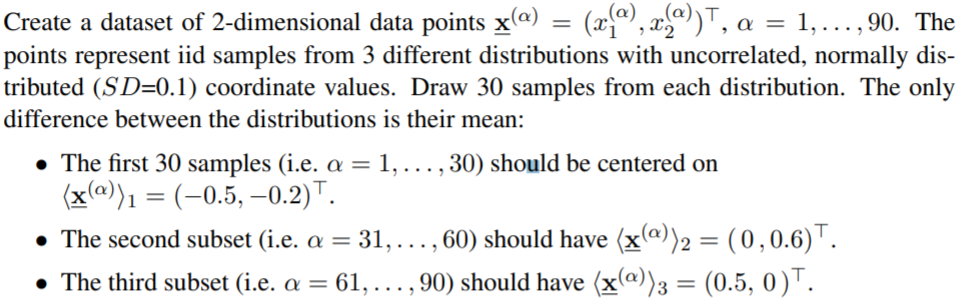

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy import linalg as LA

In [14]:
D1 = np.random.multivariate_normal((-0.5,-0.2),[[0.1**2, 0], [0, 0.1**2]],30)
D2 = np.random.multivariate_normal((0,0.6),[[0.1**2, 0], [0, 0.1**2]],30)
D3 = np.random.multivariate_normal((0.5,0),[[0.1**2, 0], [0, 0.1**2]],30)
D = np.concatenate((D1,D2,D3), axis=-2)

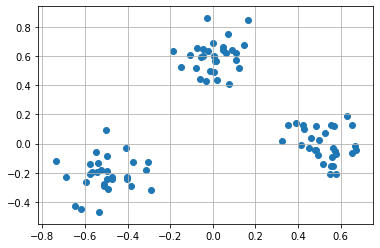

In [15]:
plt.scatter(D[:,0],D[:,1])
plt.grid()

In [16]:
x_limits = np.arange(-1, 1, 0.01)
y_limits = np.arange(-0.5, 1, 0.01)
xx, yy = np.meshgrid(x_limits, y_limits)
XX = xx.flatten().reshape(xx.shape[0] * xx.shape[1],1)
YY = yy.flatten().reshape(xx.shape[0] * xx.shape[1],1)
test_data = np.concatenate((XX, YY), axis=-1)

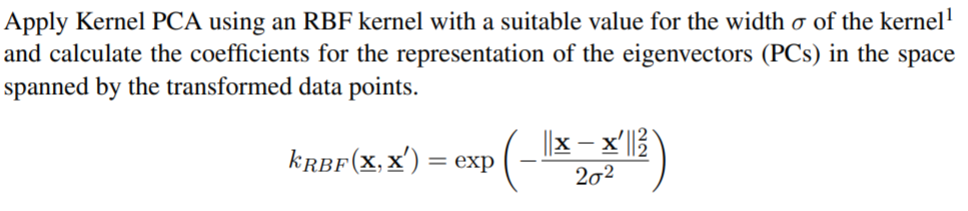

In [5]:
sigma=0.1
def rbf_kernel(x, y):
    return np.exp(-((LA.norm(x-y))**2 /  (2*sigma**2) ))    

In [6]:
def centered_kernel_matrix(K):
    nrows , ncols = K.shape
    return (K - K.mean(axis=-1).reshape(nrows,1)  - K.mean(axis=-2).reshape(1,ncols) +  K.mean() )

In [7]:
def K(new_sample, reference):
    p = reference.shape[0]
    q = new_sample.shape[0]
    K= np.empty((q,p))
    
    for i in range(q):
        for j in range(p):
            K[i,j] = rbf_kernel(new_sample[i,:] , reference[j,:])
    return centered_kernel_matrix(K)

In [ ]:
K_train = K(D,D)
lambdas, eigenvecs = eigh(K_train/90)
lambdas = lambdas[::-1]
eigenvecs = eigenvecs[:,::-1]
eigenvecs_normalized = np.empty(eigenvecs.shape)
for i in range(70):
    eigenvecs_normalized[:,i] = eigenvecs[:,i]   /    ( (np.sqrt(90*lambdas[i])) )
test_kernel_matrix = K(test_data,D)
n_pcs = 8
U_projection = eigenvecs_normalized[:,0:n_pcs].T
projections = U_projection @ test_kernel_matrix.T
PCS = [projections[i,:] for i in range(8)]

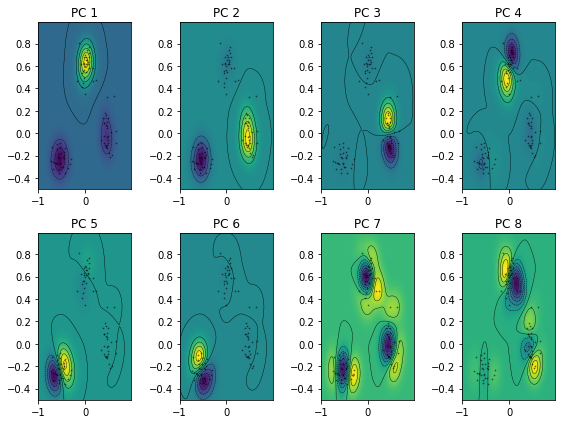

In [13]:
fig, axes = plt.subplots(2,4, figsize=(12,10))
for i,j in enumerate(axes.flatten()):
    j.contourf(xx, yy, PCS[i].reshape(xx.shape), 200)
    j.contour(xx, yy, PCS[i].reshape(xx.shape), 10, colors='black', linewidths=.4)
    j.scatter(D[:,0],D[:,1], c='k' , s=0.5, alpha=0.5)
    j.set_title('PC {}'.format(i+1))
fig.tight_layout()

<IPython.core.display.Javascript object>


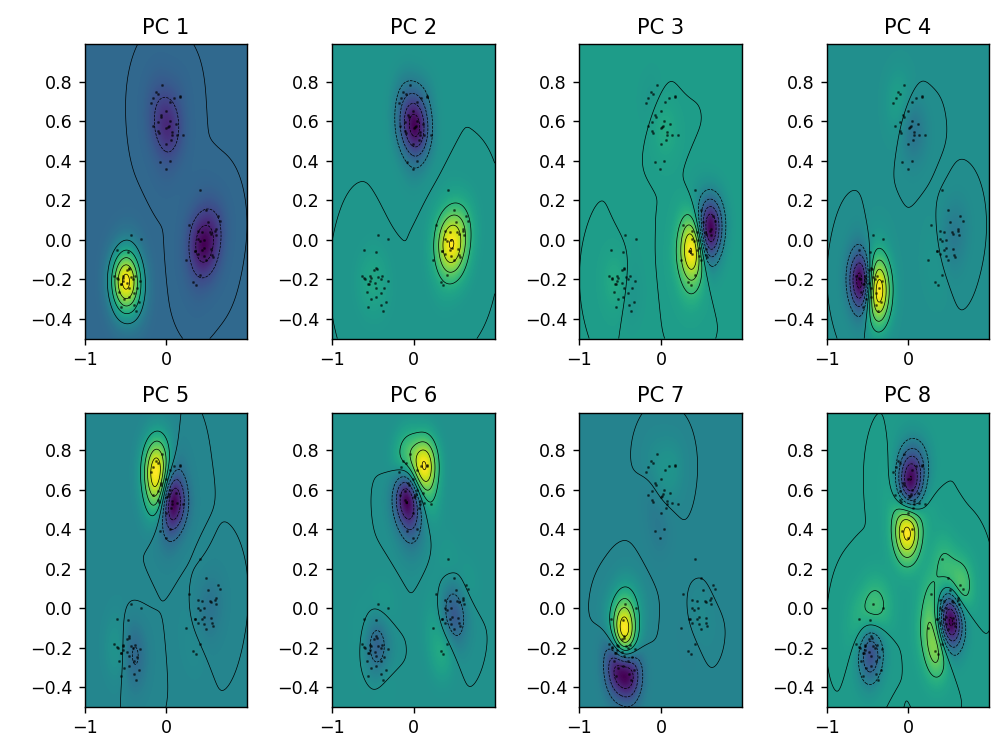

In [1558]:
fig, axes = plt.subplots(2,4, figsize=(8,6))
for i,j in enumerate(axes.flatten()):
    j.contourf(xx, yy, PCS[i].reshape(xx.shape), 200)
    j.contour(xx, yy, PCS[i].reshape(xx.shape), 10, colors='black', linewidths=.4)
    j.scatter(D[:,0],D[:,1], c='k' , s=0.5, alpha=0.5)
    j.set_title('PC {}'.format(i+1))
fig.tight_layout()

<IPython.core.display.Javascript object>


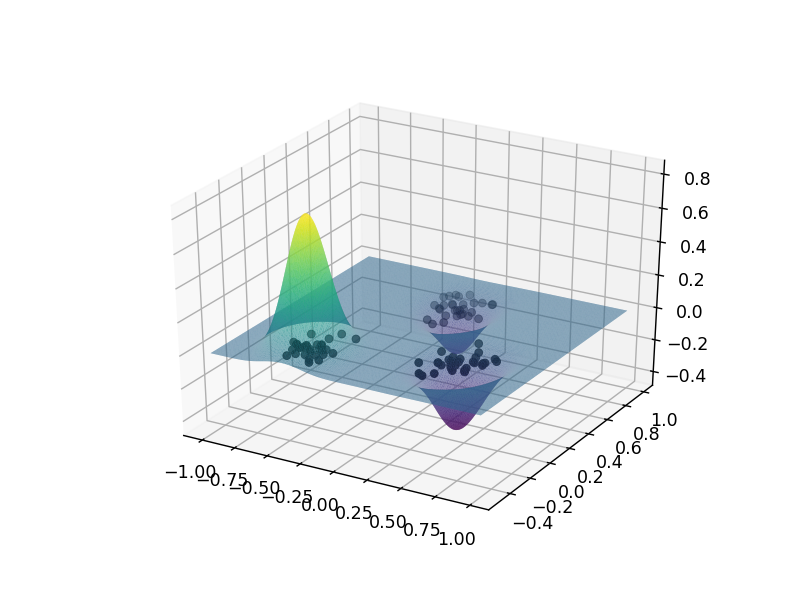

In [1554]:
%matplotlib nbagg
ax = plt.axes(projection='3d')
ax.plot_trisurf(test_data[:,0],test_data[:,1],PCS[0], cmap='viridis', linewidth=0.5, alpha=0.7);
#ax.plot_trisurf(test_data[:,0],test_data[:,1],PC2, cmap='viridis', linewidth=0.5, alpha=0.7);
ax.scatter(D[:,0], D[:,1], 0, c='k', linewidth=0.5)

<IPython.core.display.Javascript object>


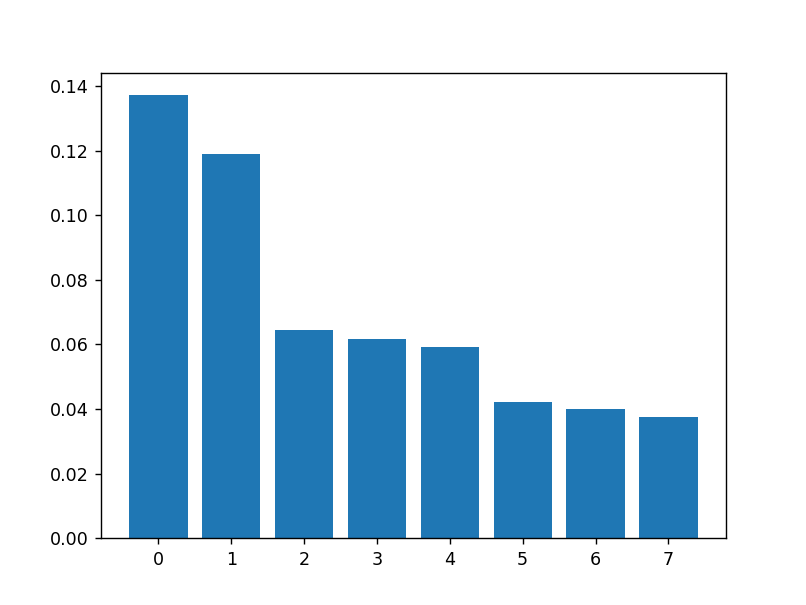

<BarContainer object of 8 artists>

In [1559]:
plt.bar(np.arange(8), lambdas[0:8])

# Sklearn

In [42]:
import pandas as pd
import numpy as np

In [43]:
import matplotlib.pyplot as plt

In [72]:
import keras
from keras import datasets
from skimage.util import random_noise
import matplotlib.pyplot as plt 
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


digits = keras.datasets.mnist.load_data(path="mnist.npz")[0][0]   #Load MINST DataSet
target = keras.datasets.mnist.load_data(path="mnist.npz")[0][1]
digits = digits.reshape(60000,28*28)
#digits = digits[0:3000,:]                                   #Choosing first 3000 images

X_train, X_test, y_train, y_test = train_test_split(digits, target,train_size=7291, random_state=42)
noisy_img = random_noise(X_train, mode='s&p',amount=0.1)    #Salt & Pepper Noise
digits_noisy = noisy_img

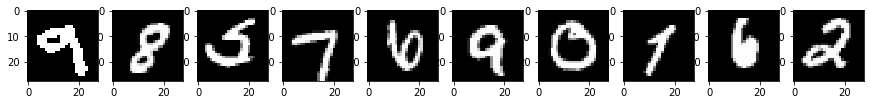

In [76]:
fig, axes = plt.subplots(1,10, figsize=(15,15))

for i,j in enumerate(axes):
    j.imshow(X_train[i,:].reshape(28,28), cmap='gray')

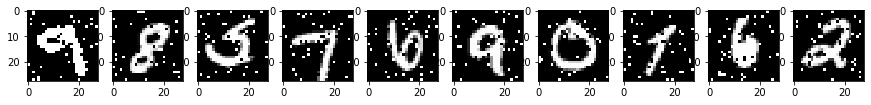

In [74]:
fig, axes = plt.subplots(1,10, figsize=(15,15))
for i,j in enumerate(axes):
    j.imshow(noisy_img[i,:].reshape(28,28), cmap='gray')

In [56]:
from sklearn.decomposition import PCA
def plot_linearpca(components):
    pca = PCA(n_components=components)
    pca.fit(digits_noisy)
    components = pca.transform(digits_noisy)
    filtered = pca.inverse_transform(components)
    
    fig, axes = plt.subplots(1,10, figsize=(15,15))

    for i,j in enumerate(axes):
        j.imshow(filtered[i,:].reshape(28,28), cmap='gray')
    

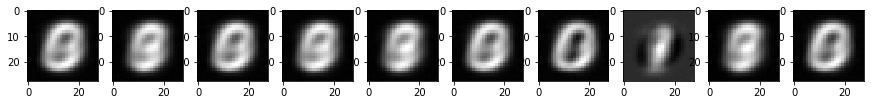

In [57]:
plot_linearpca(1)

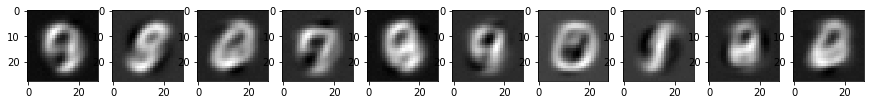

In [58]:
plot_linearpca(5)

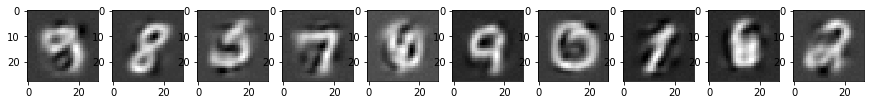

In [59]:
plot_linearpca(30)

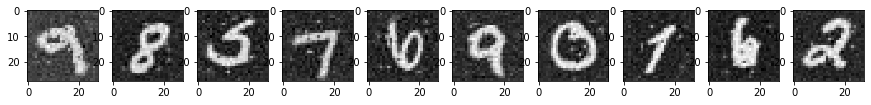

In [60]:
plot_linearpca(256)

$$\text{KERNEL_PCA}$$

In [61]:
from sklearn.decomposition import KernelPCA
def plot_kernelpca(components):
    
    kpca = KernelPCA(n_components=components,kernel= 'poly',fit_inverse_transform=True, degree=2)
    kpca.fit(digits_noisy)
    #X = kpca.transform(digits_noisy)
    X = kpca.X_transformed_fit_
    filtered = kpca.inverse_transform(X)
       
    fig, axes = plt.subplots(1,10, figsize=(15,15))

    for i,j in enumerate(axes):
        j.imshow(filtered[i,:].reshape(28,28), cmap='gray')
    

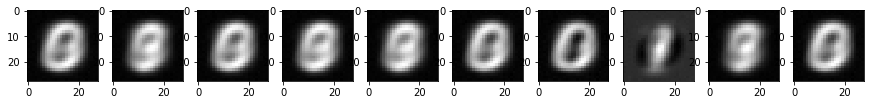

In [77]:
plot_linearpca(1)

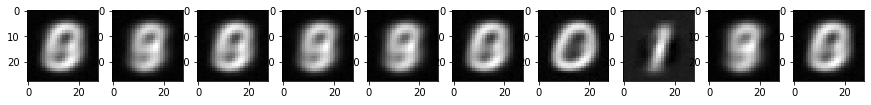

In [78]:
plot_kernelpca(1)

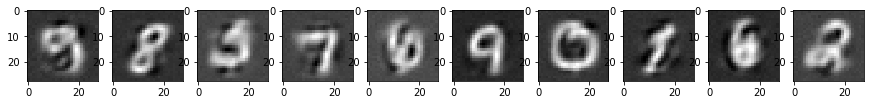

In [79]:
plot_linearpca(30)

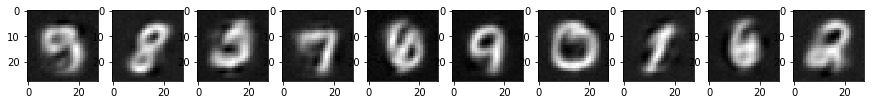

In [80]:
plot_kernelpca(30)

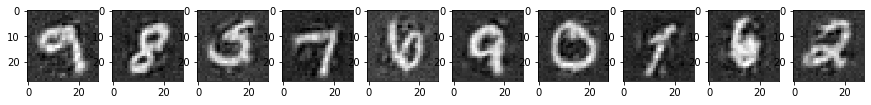

In [81]:
plot_linearpca(100)

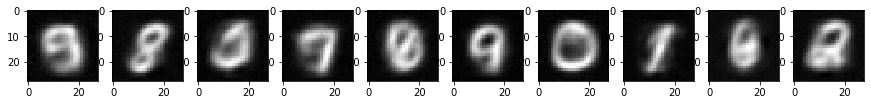

In [82]:
plot_kernelpca(100)

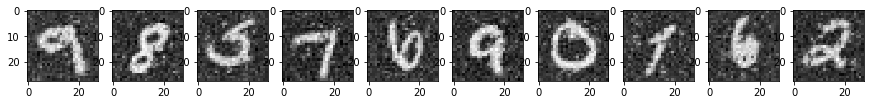

In [83]:
plot_linearpca(256)

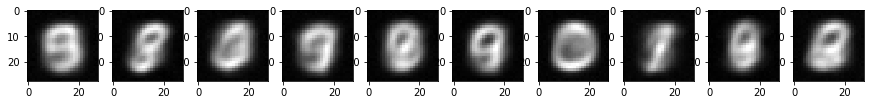

In [84]:
plot_kernelpca(256)